## Comparative Analysis of Logistic Regression and Decision Tree Models for Predicting Customer Churn

**Author:** Keziah Gicheha.

## Overview

In this project, I developed and evaluated two machine learning models—Logistic Regression and Decision Tree—to predict customer churn. The primary goal was to identify patterns and features that contribute to customer attrition, enabling the business to take proactive measures to retain customers.

I began by building a baseline logistic regression model, which showed reasonable accuracy but exhibited limitations in recall, indicating that it struggled to correctly identify customers who would churn. To address this, we introduced a decision tree classifier, which offered a more balanced performance, particularly in terms of recall, and provided clearer insights into the key features driving churn.

By comparing the results of both models, I was able to recommend the most effective approach for predicting customer churn, considering both the accuracy and interpretability of the models. This analysis is intended to guide the business in implementing targeted retention strategies, while also identifying areas for further model refinement.

## Business Problem

SyriaTel, a telecommunications company, is facing the challenge of customer churn — customers leaving the service, resulting in lost revenue. Retaining customers is crucial for the company’s profitability and growth, as acquiring new customers often costs more than keeping existing ones. The company needs to identify customers who are likely to stop doing business with them so that targeted retention strategies can be implemented.

Data Analysis Questions. 

1. What are the factors that indicate the churn of customers?
I will identify the features or behaviors that strongly corelate with customers leaving the service which will help the business to understand the root causes of the churn

2. Can it be predicted whether a customer will churn in the near future? 
By building a predictive model, the company can proactively identify at-risk customers and take action to retain them before they leave.

3. What is the expected accuracy of the churn prediction model?
Understanding the model's accuracy helps the business gauge the reliability of the predictions and determine if the model is fit for decision-making.

4. What customer segments are most at risk of churning?
Segmenting customers based on their churn risk allows for more personalized and effective retention strategies.

By understanding and predicting churn, SyriaTel can reduce revenue losses, improve customer satisfaction, and allocate resources more efficiently toward retention efforts. This proactive approach can significantly impact the company's bottom line and competitive edge in the market.


## Data Understanding

 The data for this project has been sourced from <a href="https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset"> Kaggles Website</a> and it relates to the data analysis questions since it has the information that is needed to predict the churn of customers in the company. 
The data represent customer information for a telecommunications company, specifically focused on customer churn behavior. The sample includes individual customers, with each row representing a single customer. The variables included in the dataset capture a variety of customer attributes and usage patterns, which are crucial for predicting whether a customer is likely to churn.

The variables are as follows.

Customer Demographics:

* Area Code: The geographical area code where the customer is located.
* International Plan: Whether the customer has an international calling plan (Yes/No).
* Voice Mail Plan: Whether the customer has a voicemail plan (Yes/No).
Usage Statistics:

* Total Day Minutes: The total number of minutes the customer used during the day.
* Total Day Calls: The total number of calls the customer made during the day.
* Total Day Charge: The total charge for day usage.
* Total Eve Minutes: The total number of minutes the customer used during the evening.
* Total Eve Calls: The total number of calls the customer made during the evening.
* Total Eve Charge: The total charge for evening usage.
* Total Night Minutes: The total number of minutes the customer used during the night.
* Total Night Calls: The total number of calls the customer made during the night.
* Total Night Charge: The total charge for night usage.
* Total Intl Minutes: The total number of minutes the customer used for international calls.
* Total Intl Calls: The total number of international calls the customer made.
* Total Intl Charge: The total charge for international usage.

Customer Service Interaction:

* Customer Service Calls: The number of calls the customer made to customer service.

Target Variable:

* Churn: Indicates whether the customer churned (True) or stayed (False).

In [334]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Import necessary functions
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn import tree

In [335]:
#Load the dataset 

st_data = pd.read_csv('Data\data.csv', index_col= False)
st_data.head(5)



,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [336]:
#Describe the data
st_data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [337]:
st_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [338]:
#identify unique values 
# Check unique values for each column
for column in st_data.columns:
    unique_values = st_data[column].unique()
    num_unique_values = len(unique_values)
    print(f"Column '{column}' has {num_unique_values} unique values.")
    print(unique_values)
    print("\n")


Column 'state' has 51 unique values.
['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']


Column 'account length' has 212 unique values.
[128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129  44  79  31 124
  37 159 194 154  21 133 224  58  11 109 102 165  18  30 176  47 190 1

## Data Preparation
1. Data Cleaning. 
I checked for missing data, which I fould no missing data, Missing values can skew the analysis and lead to incorrect conclusions.
 * I also checked for duplicates which there were none for ths dataset. Duplicate data can lead to biased model training and inaccurate results.
2. Data Transformation. 
The dataset included categorical variables such as International Plan, Voice Mail Plan, and Area Code. These were transformed into numerical values using techniques like one-hot encoding or label encoding to make them suitable for machine learning models.
Feature Scaling: Features like Total Day Minutes, Total Day Calls, and other numerical variables were scaled to ensure that all features contributed equally to the model.

3. Feature Selection
Features that were highly correlated with each other, such as Total Day Minutes and Total Day Charge, were analyzed to decide whether both were necessary for the model. In cases where multicollinearity was identified, one of the correlated features was removed to prevent redundancy and improve model interpretability.

4. Splitting the data
Training and Testing Split: The data was split into training and testing sets, typically using an 70-30 split. The training set was used to train the model, while the testing set was reserved for evaluating the model's performance on unseen data. This helps in assessing the model's generalization capability.

* Cross-Validation: To further validate the model, cross-validation techniques like k-fold cross-validation were used. This involved splitting the training data into k subsets, training the model k times, each time using a different subset as the validation set, and the remaining data as the training set. This approach helps in reducing overfitting and provides a more robust estimate of the model's performance.





In [339]:
## Exploratory Data Analysis

# Create a new copy of the dataframe for EDA
# Perform EDA and feature engineering on st_data_eda
st_data_eda = st_data.copy()

#Data Cleaning - check for missing values 
st_data_eda.isna().sum()


state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

There are no missing values from this dataset, all rows have values.

In [340]:

# Drop 'phone number ' from the EDA dataframe
st_data_eda = st_data_eda.drop(columns=['phone number'])

# Verify the columns have been removed
print(st_data_eda.columns)


Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn'],
      dtype='object')


In [341]:
# Check for duplicates in the dataset
duplicate_rows = st_data_eda[st_data_eda.duplicated()]

# Print the number of duplicate rows
print(f'Number of duplicate rows: {duplicate_rows.shape[0]}')

Number of duplicate rows: 0


The phone number feature seems to be an identifier, hence I removed them from the dataset.

In [342]:
#check the first 5 rows with te removed features 
st_data_eda.head(5)

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [343]:
# Check the unique values in each column
for column in st_data_eda.columns:
    unique_values = st_data_eda[column].unique()
    print(f"Column: {column}")
    print(f"Unique values: {unique_values}")
    print("\n")


Column: state
Unique values: ['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']


Column: account length
Unique values: [128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129  44  79  31 124
  37 159 194 154  21 133 224  58  11 109 102 165  18  30 176  47 190 152
  26  69 186 1

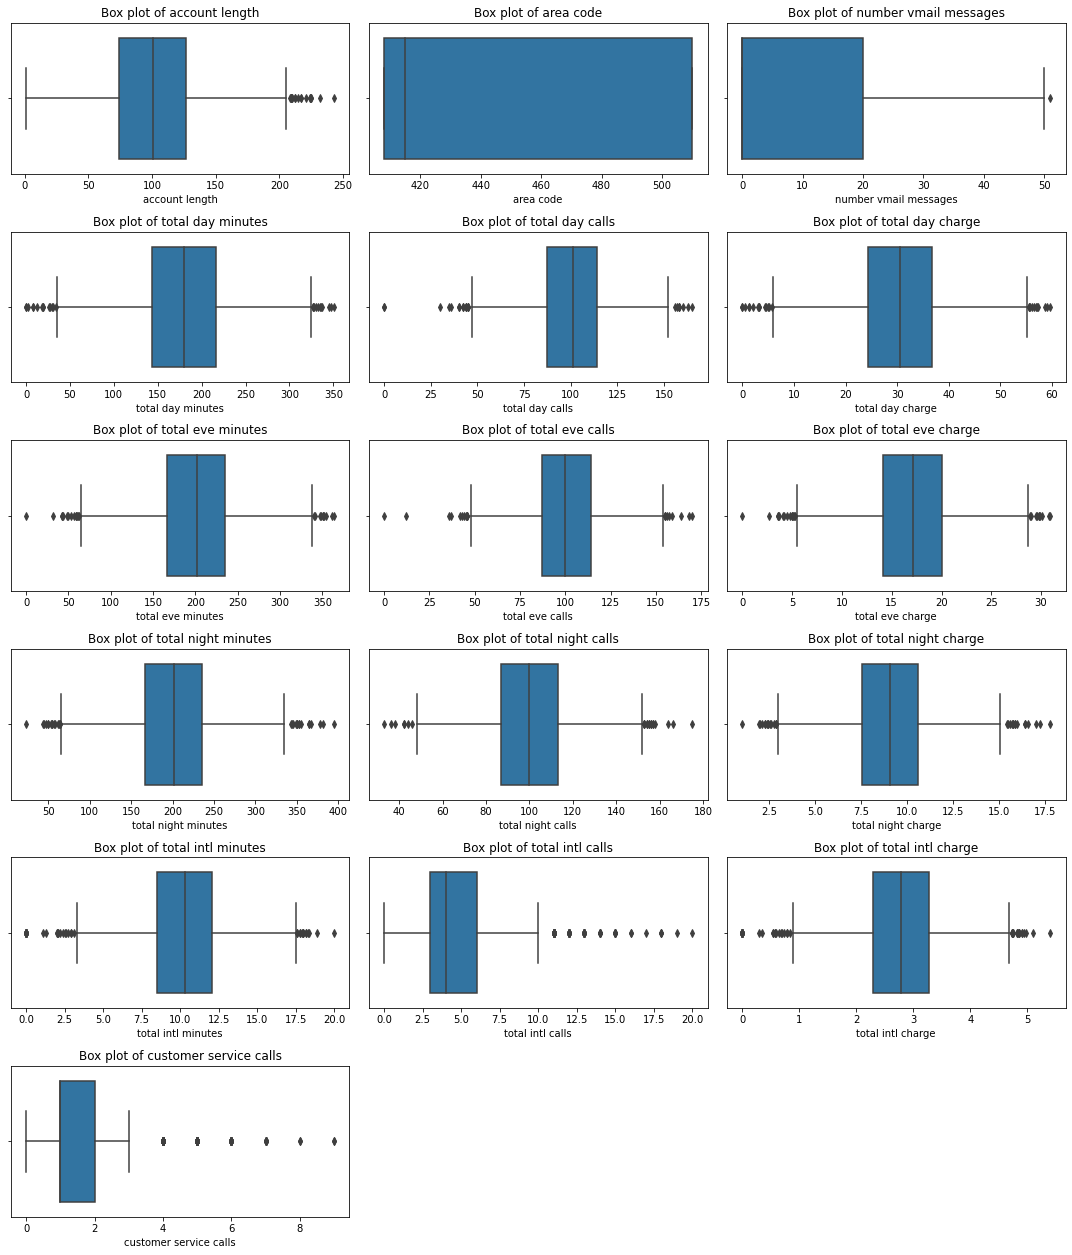

In [344]:
#check for outliers
#use box plots to check for the numerical columns in the dataset 

# Set the size of the plots
plt.figure(figsize=(15, 20))

# Loop through each numerical column and create a box plot
for i, column in enumerate(st_data_eda.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(len(st_data_eda.columns) // 3 + 1, 3, i)
    sns.boxplot(x=st_data[column])
    plt.title(f'Box plot of {column}')
    plt.tight_layout()

plt.show()

From the box plots above many of the features have outliers, but intuitively choose to keep them to see how the model will perform with the outliers first, before proceeding to remove them.

### Univariate Analysis
Analyze individual features (distribution, summary statistics).





In [345]:
# Summary statistics for numeric features
summary_stats = st_data_eda.describe()
print(summary_stats)

# Summary statistics for categorical features
categorical_features = ['state', 'area code', 'international plan', 'voice mail plan', 'churn']
for feature in categorical_features:
    print(f"\n{feature}:\n{st_data_eda[feature].value_counts()}")


       account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.25943

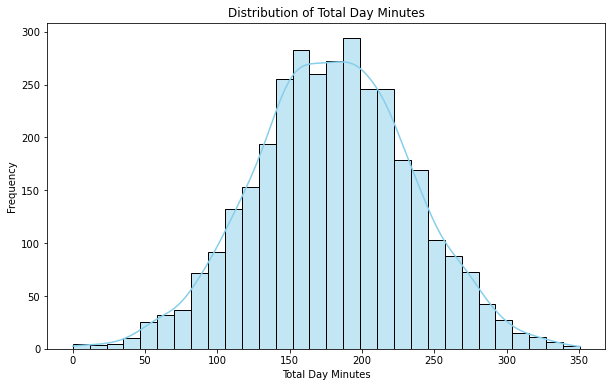

In [346]:
# Distribution of Total Day Minutes
plt.figure(figsize=(10, 6))
sns.histplot(st_data_eda['total day minutes'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Total Day Minutes')
plt.xlabel('Total Day Minutes')
plt.ylabel('Frequency')
plt.show()


There is an observation that the "Total Day minutes" is normally distributed with the average minutes being rough about 180 minutes per day for a user.

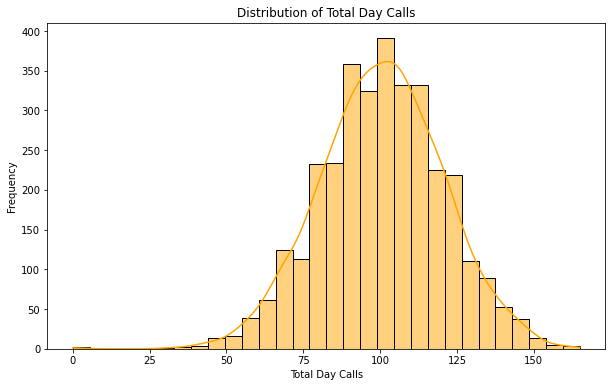

In [347]:
# Distribution of Total Day Calls
plt.figure(figsize=(10, 6))
sns.histplot(st_data_eda['total day calls'], bins=30, kde=True, color='orange')
plt.title('Distribution of Total Day Calls')
plt.xlabel('Total Day Calls')
plt.ylabel('Frequency')
plt.show()


From the histogram above, "Total day calls" has a slight left skewness.

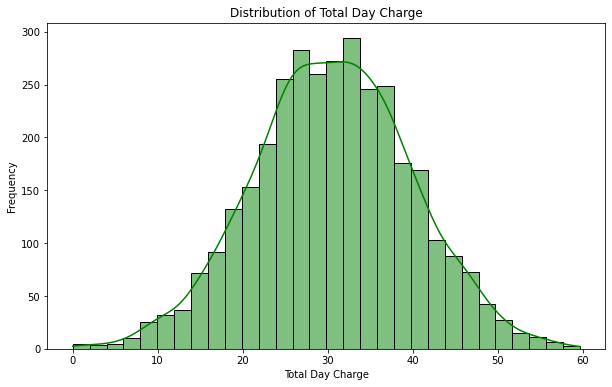

In [348]:
# Distribution of Total Day Charge
plt.figure(figsize=(10, 6))
sns.histplot(st_data_eda['total day charge'], bins=30, kde=True, color='green')
plt.title('Distribution of Total Day Charge')
plt.xlabel('Total Day Charge')
plt.ylabel('Frequency')
plt.show()


The distribution of the total day charge looks normally distributed, with the highest charge rate approximately 270. No skewness visible.

### Categorical Features Analysis

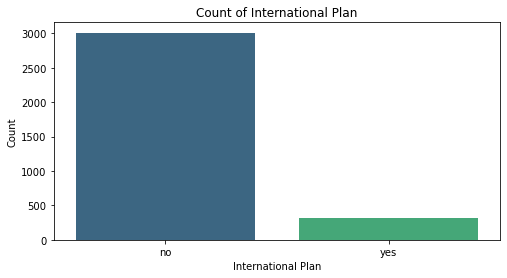

In [349]:
# Count plot for International Plan
plt.figure(figsize=(8, 4))
sns.countplot(x='international plan', data=st_data_eda, palette='viridis')
plt.title('Count of International Plan')
plt.xlabel('International Plan')
plt.ylabel('Count')
plt.show()


In [350]:
st_data_eda["international plan"].value_counts()

no     3010
yes     323
Name: international plan, dtype: int64

From this graph, 3010 users in this dataset do not have an international plan while 323 users have an international plan.

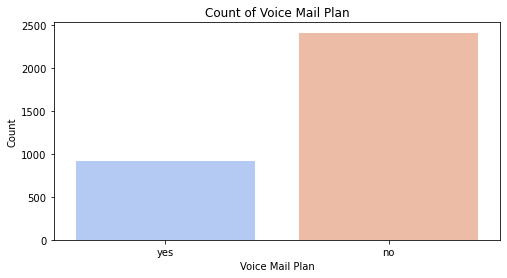

In [351]:
# Count plot for Voice Mail Plan
plt.figure(figsize=(8, 4))
sns.countplot(x='voice mail plan', data=st_data_eda, palette='coolwarm')
plt.title('Count of Voice Mail Plan')
plt.xlabel('Voice Mail Plan')
plt.ylabel('Count')
plt.show()


In [352]:
st_data_eda['voice mail plan'].value_counts()

no     2411
yes     922
Name: voice mail plan, dtype: int64

2411 users from the dataset do not have a voice mail plan and 922 users have a voice mail plan

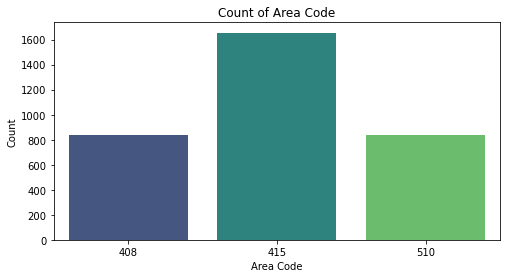

In [353]:
# Count plot for Area Code
plt.figure(figsize=(8, 4))
sns.countplot(x='area code', data=st_data_eda, palette='viridis')
plt.title('Count of Area Code')
plt.xlabel('Area Code')
plt.ylabel('Count')
plt.show()


Approximately 900 users are from the 408 area code, 1500 users from the 415 area code and 800 users from the 510 area code.

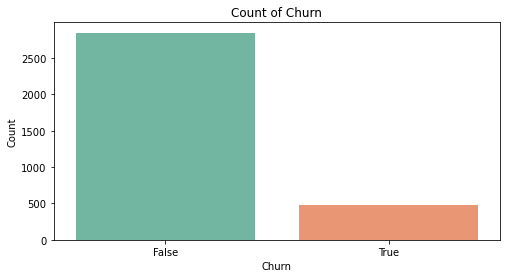

In [354]:
# Count plot for Churn
plt.figure(figsize=(8, 4))
sns.countplot(x='churn', data=st_data_eda, palette='Set2')
plt.title('Count of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()


In [355]:
st_data_eda['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

From the dataset, the number of customers who churned was 483 while those who did not was 2850 users.

### Bivariate Analysis
Analyze the relationship between each feature and the target variable using visualizations (e.g., box plots, bar charts) and summary statistics

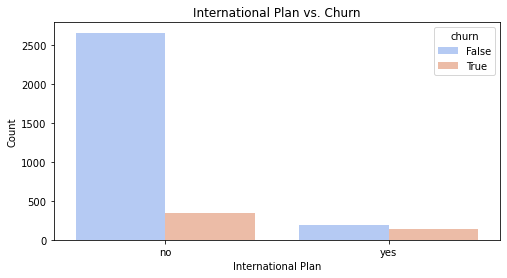

In [356]:
#International plan vs Churn
plt.figure(figsize=(8, 4))
sns.countplot(x='international plan', hue='churn', data=st_data_eda, palette='coolwarm')
plt.title('International Plan vs. Churn')
plt.xlabel('International Plan')
plt.ylabel('Count')
plt.show()


From the graph above, there is a higher number of customers who churned who do not have an international plan compared to who didnt.

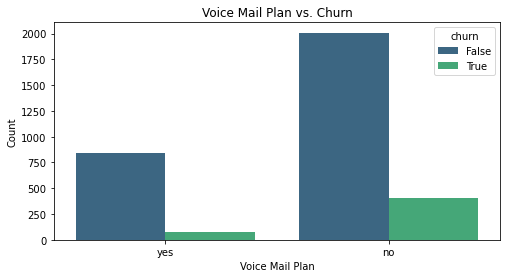

In [357]:
plt.figure(figsize=(8, 4))
sns.countplot(x='voice mail plan', hue='churn', data=st_data_eda, palette='viridis')
plt.title('Voice Mail Plan vs. Churn')
plt.xlabel('Voice Mail Plan')
plt.ylabel('Count')
plt.show()


Customers without a voicemail plan churned more frequently than those with a voicemail plan.

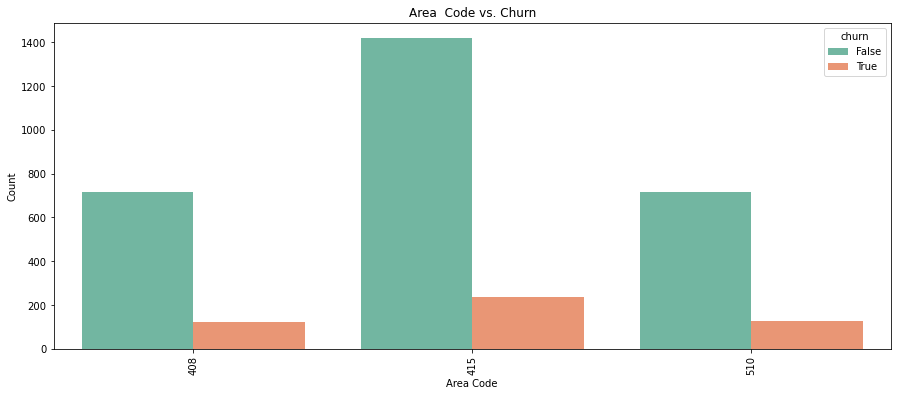

In [358]:
plt.figure(figsize=(15, 6))
sns.countplot(x='area code', hue='churn', data=st_data_eda, palette='Set2')
plt.title('Area  Code vs. Churn')
plt.xlabel('Area Code')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


Customers from area code 415 had the highest churn rate, followed by those from area code 510 and area code 408.

In [359]:
# Grouping by churn and calculating summary statistics
grouped_stats = st_data_eda.groupby('churn').mean()
print(grouped_stats)


       account length   area code  number vmail messages  total day minutes  \
churn                                                                         
False      100.793684  437.074737               8.604561         175.175754   
True       102.664596  437.817805               5.115942         206.914079   

       total day calls  total day charge  total eve minutes  total eve calls  \
churn                                                                          
False       100.283158         29.780421         199.043298       100.038596   
True        101.335404         35.175921         212.410145       100.561077   

       total eve charge  total night minutes  total night calls  \
churn                                                             
False         16.918909           200.133193         100.058246   
True          18.054969           205.231677         100.399586   

       total night charge  total intl minutes  total intl calls  \
churn                     

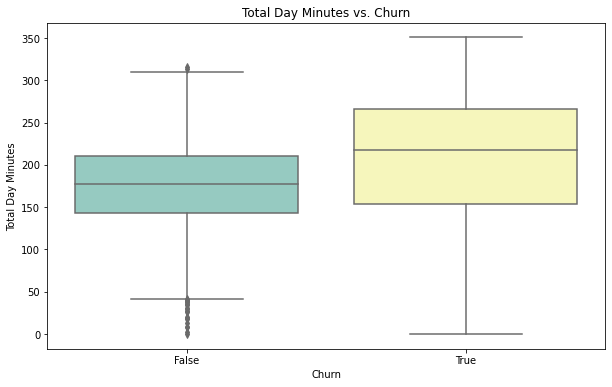

In [360]:
#bivariate Analysis for numeric features
plt.figure(figsize=(10, 6))
sns.boxplot(x='churn', y='total day minutes', data=st_data_eda, palette='Set3')
plt.title('Total Day Minutes vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Total Day Minutes')
plt.show()


Based on the box plot observations, customers who churned used more day minutes, averaging 220 minutes, compared to 170 minutes for those who did not churn. This suggests that "Total Day Minutes" could be a significant feature in predicting churn

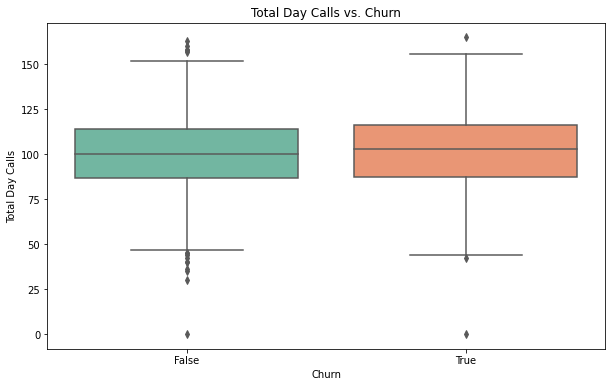

In [361]:
#Total Day Calls Vs Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='churn', y='total day calls', data=st_data_eda, palette='Set2')
plt.title('Total Day Calls vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Total Day Calls')
plt.show()


Based on the box plot observation, customers who churned made more day calls, averaging 120 calls, compared to 100 calls for those who did not churn. 

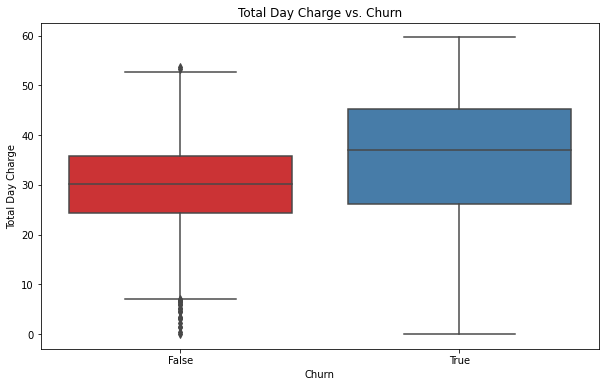

In [362]:
#Total Day Charge Vs Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='churn', y='total day charge', data=st_data_eda, palette='Set1')
plt.title('Total Day Charge vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Total Day Charge')
plt.show()


The plot indicates that customers who churned had a higher day charge of approximately 38 compared to 30 for those who did not churn. This suggests that "Total Day Charge" could also be a significant feature in predicting churn.

### Multivariate Analysis
Analyze relationships between features, identify correlations, and check for multicollinearity.

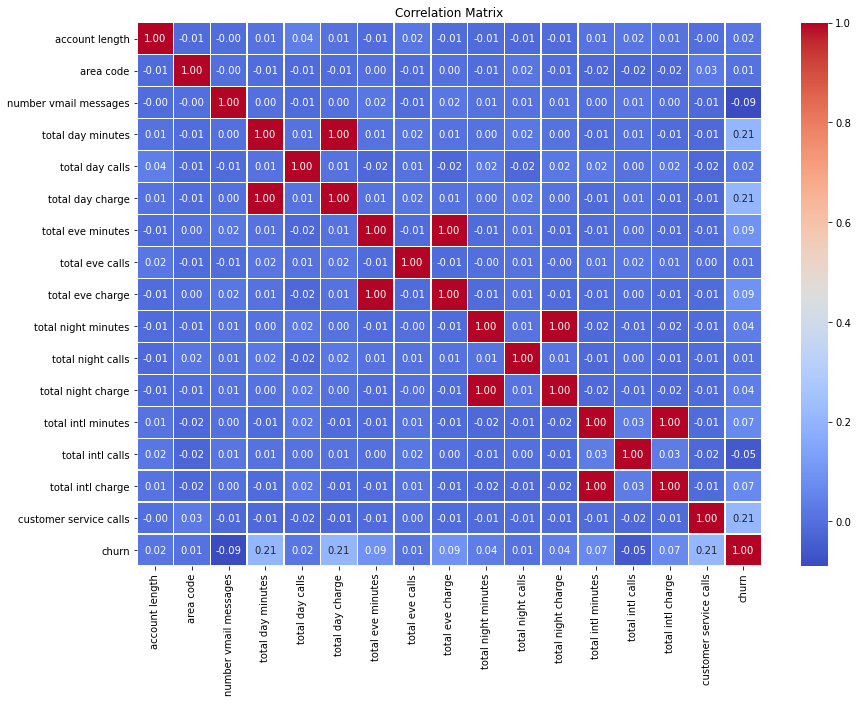

In [363]:

# Calculate the correlation matrix
correlation_matrix = st_data_eda.corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


The heat map is mostly blue , indicating a positive sign, it suggests that the independent variables are not highly correlated. However some variables have a correlation of 1, indicating that some of the features will be removed so as not to affect the model. 

To deal with the perfect correlation, I will remove the following features. 
1. Total day charge
2. Total eve charge
3. Total night charge
4. total international charge



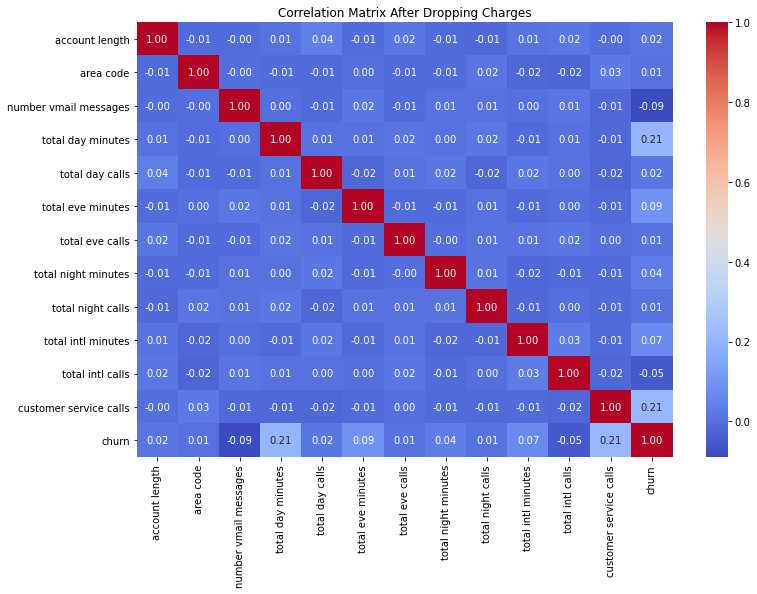

In [364]:
#drop the features stated above
st_data_eda_drop = st_data_eda.drop(columns=["total day charge", "total eve charge", "total night charge", "total intl charge"])

#create acorrelation matrix
correlation_matrix_2 = st_data_eda_drop.corr()

# Plot a heatmap of the correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_2, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix After Dropping Charges')
plt.show()



This second correlation matrix shows a better output than the first one, there is no perfect correlation among the features as before, indicating multicollinearity between features will be minimal. 


In [365]:
#multicollinearity check
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Adjust display settings to show all rows
pd.set_option('display.max_rows', None)

# Dropping the target variable
X = st_data_eda_drop.drop(columns=['churn'])

# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

# Adding a constant column for VIF calculation
X = sm.add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF
print(vif_data)


                   Feature         VIF
0                    const  312.144220
1           account length    1.015276
2                area code    1.018033
3    number vmail messages   12.062809
4        total day minutes    1.019878
5          total day calls    1.022658
6        total eve minutes    1.018091
7          total eve calls    1.021489
8      total night minutes    1.016439
9        total night calls    1.017095
10      total intl minutes    1.019030
11        total intl calls    1.015103
12  customer service calls    1.017733
13                state_AL    2.482560
14                state_AR    2.032361
15                state_AZ    2.193737
16                state_CA    1.642227
17                state_CO    2.232156
18                state_CT    2.380871
19                state_DC    2.014336
20                state_DE    2.143200
21                state_FL    2.189126
22                state_GA    2.019812
23                state_HI    1.992987
24                state_I

From the output above, the features of voice mail plan (12), number of vmail messages (12) have greater values of more than 5, suggesting that the corresponding feature is highly correlated with other features. 

Also I will drop the state feature as well because I have the area code feature, which will be converted into object type (categorical column)

The constant (intercept) term has a high VIF, which is typical and not concerning because it doesn't relate to multicollinearity issues among the explanatory variables.

In [366]:
#deleting the state feature 

state_columns = [col for col in st_data_eda_drop.columns if col.startswith('state')]
st_eda_clean = st_data_eda_drop.drop(columns=state_columns)

# Display the first few rows of the cleaned DataFrame
st_eda_clean.head(3)

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn
0,128,415,no,yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False
1,107,415,no,yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False
2,137,415,no,no,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False


In [367]:
# Convert integer column "area code" to object type
st_eda_clean['area code'] = st_eda_clean['area code'].astype('object')
st_eda_clean.info() #to confirm the area code column is of object dtype


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   area code               3333 non-null   object 
 2   international plan      3333 non-null   object 
 3   voice mail plan         3333 non-null   object 
 4   number vmail messages   3333 non-null   int64  
 5   total day minutes       3333 non-null   float64
 6   total day calls         3333 non-null   int64  
 7   total eve minutes       3333 non-null   float64
 8   total eve calls         3333 non-null   int64  
 9   total night minutes     3333 non-null   float64
 10  total night calls       3333 non-null   int64  
 11  total intl minutes      3333 non-null   float64
 12  total intl calls        3333 non-null   int64  
 13  customer service calls  3333 non-null   int64  
 14  churn                   3333 non-null   

State feature removed, calculate the VIF again


In [368]:
# Adjust display settings to show all rows
pd.set_option('display.max_rows', None)

# Dropping the target variable
X = st_eda_clean.drop(columns=['churn'])

# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

# Adding a constant column for VIF calculation
X = sm.add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF
print(vif_data)

                   Feature         VIF
0                    const  144.688648
1           account length    1.004152
2    number vmail messages   11.895531
3        total day minutes    1.004961
4          total day calls    1.003927
5        total eve minutes    1.002106
6          total eve calls    1.001597
7      total night minutes    1.002864
8        total night calls    1.003710
9       total intl minutes    1.006055
10        total intl calls    1.004135
11  customer service calls    1.003293
12           area code_415    1.504926
13           area code_510    1.503982
14  international plan_yes    1.010065
15     voice mail plan_yes   11.899038


I will remove the number vmail messages feature, because we have the voice mail plan feature and calcualte the VIF again.

In [369]:

#drop the features stated above
st_eda_clean_vif = st_eda_clean.drop(columns=["number vmail messages"])


#multicollinearity check
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Adjust display settings to show all rows
pd.set_option('display.max_rows', None)

# Dropping the target variable
X = st_eda_clean_vif.drop(columns=['churn'])

# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

# Adding a constant column for VIF calculation
X = sm.add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF
print(vif_data)


                   Feature         VIF
0                    const  144.685205
1           account length    1.003423
2        total day minutes    1.004889
3          total day calls    1.003915
4        total eve minutes    1.001999
5          total eve calls    1.001597
6      total night minutes    1.002814
7        total night calls    1.002976
8       total intl minutes    1.005892
9         total intl calls    1.003605
10  customer service calls    1.003107
11           area code_415    1.504909
12           area code_510    1.503977
13  international plan_yes    1.009948
14     voice mail plan_yes    1.001703


<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


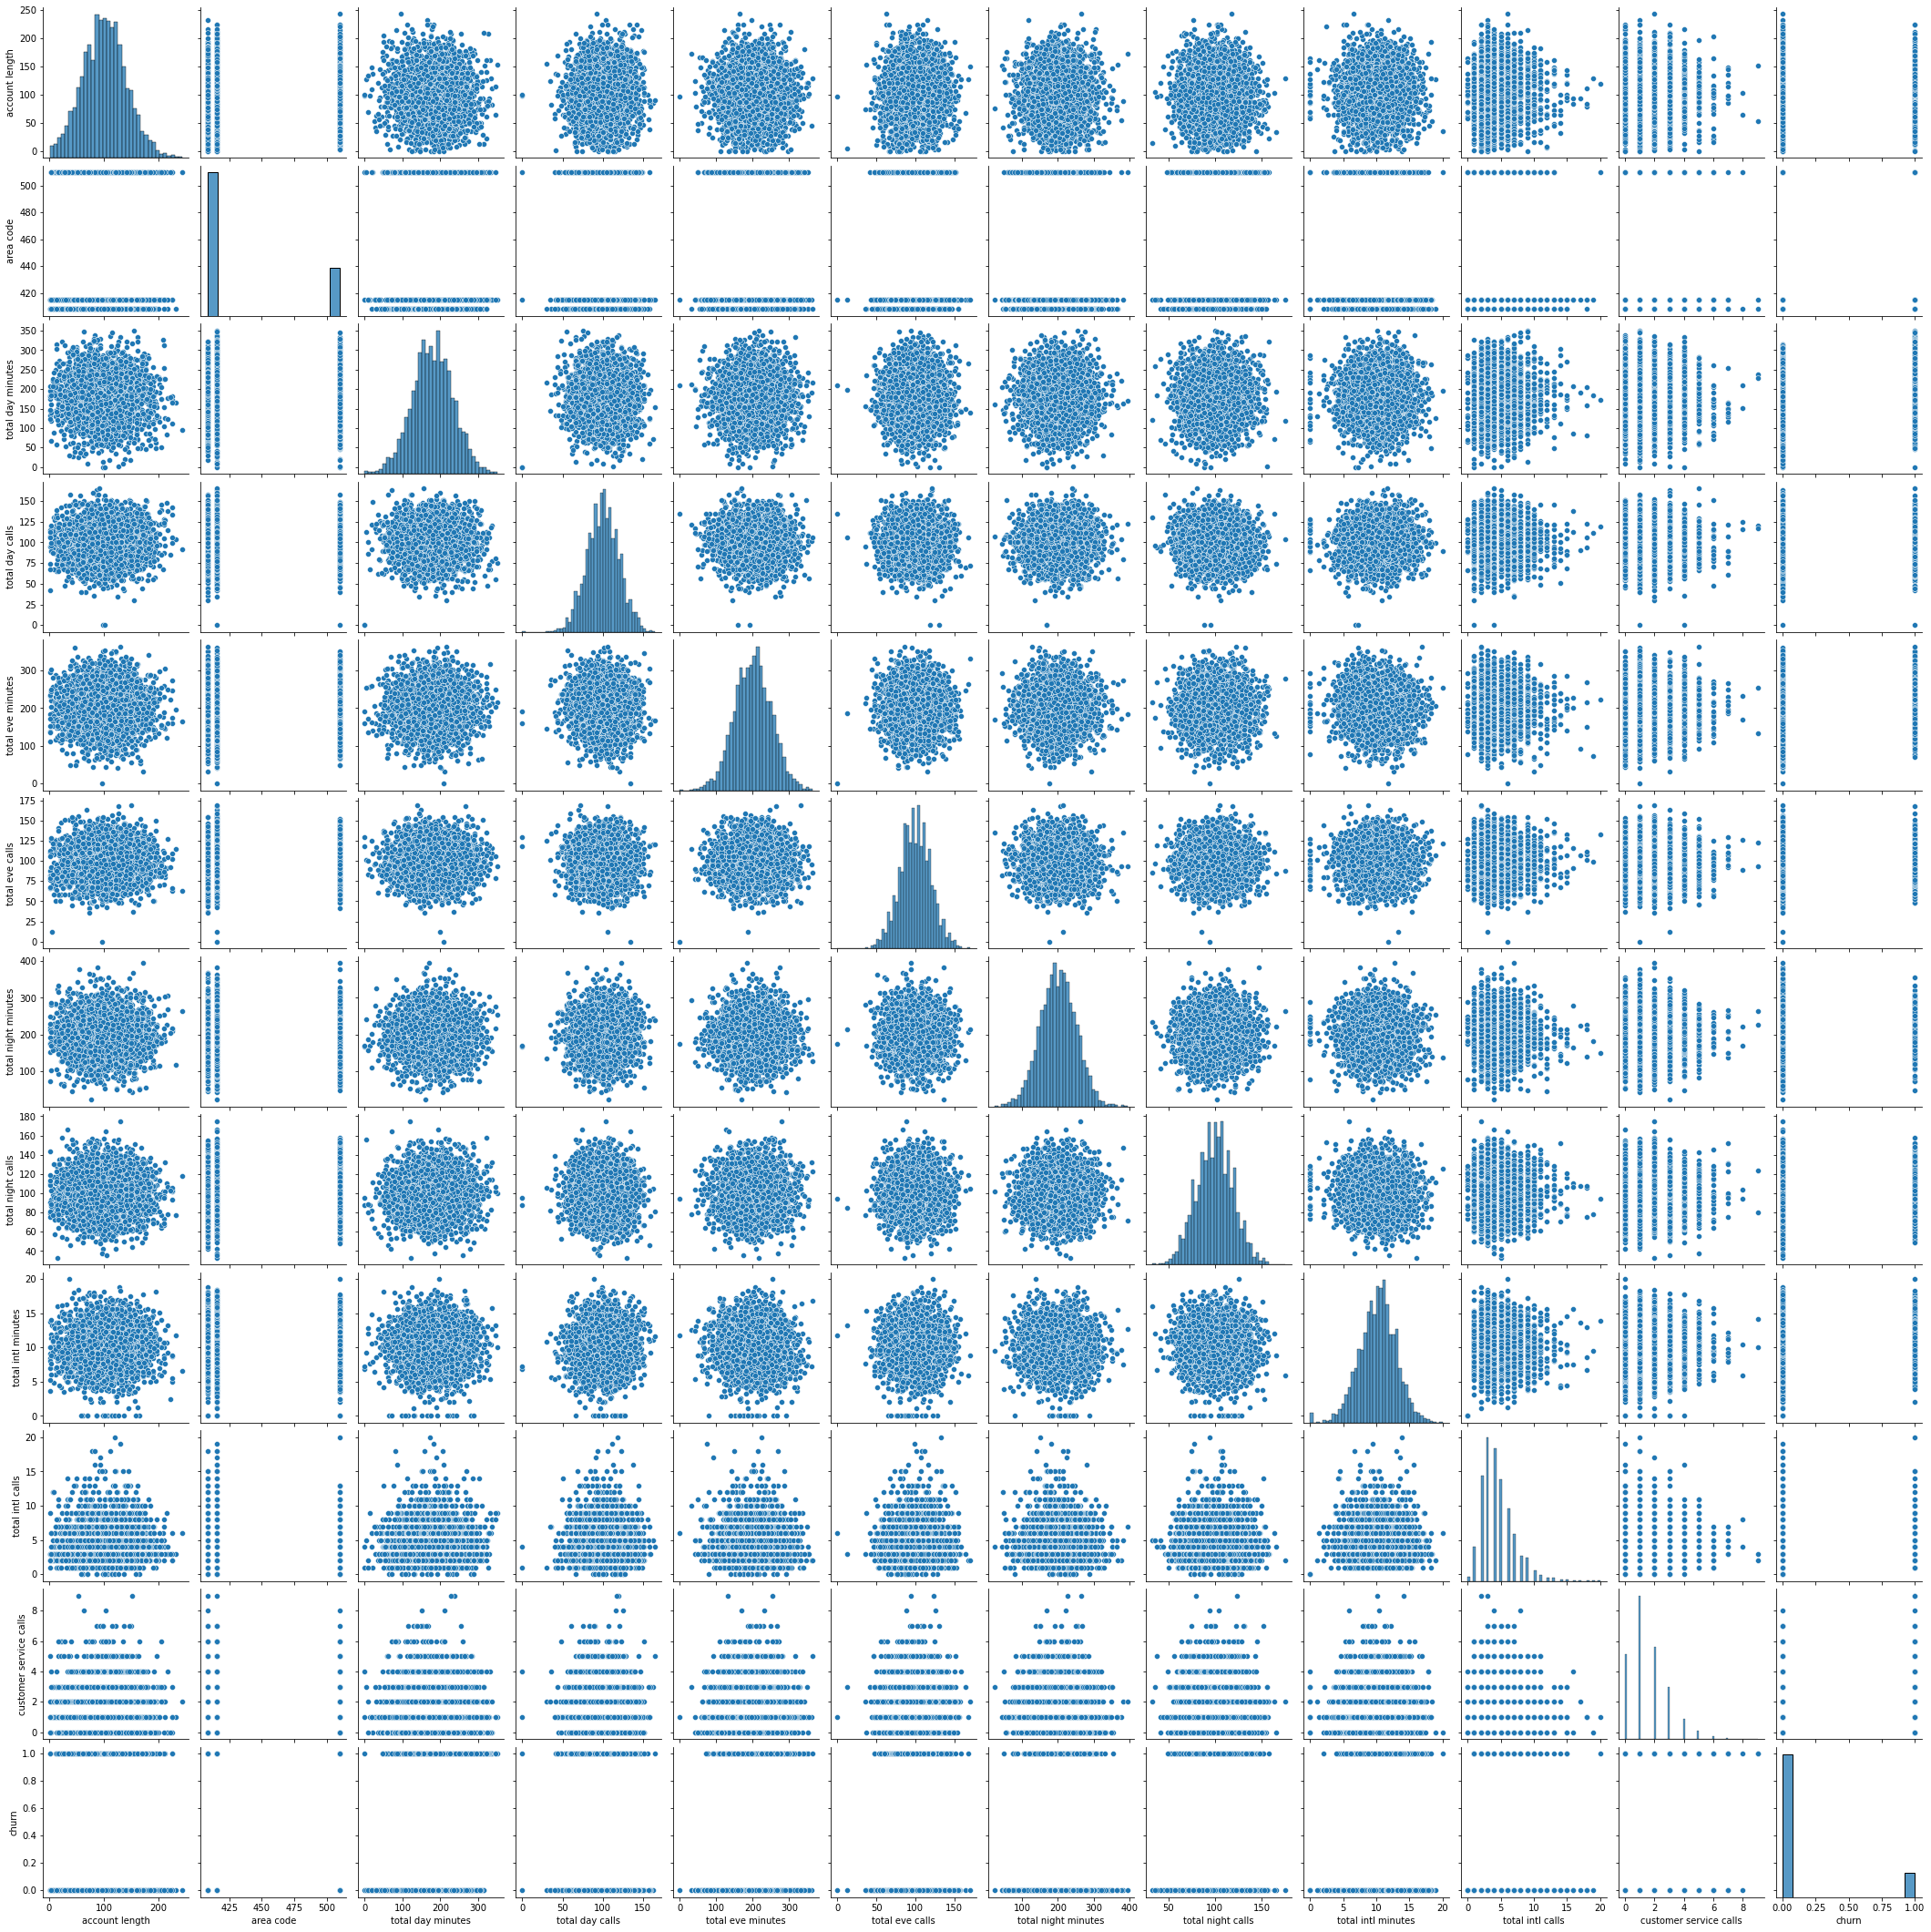

In [370]:
sns.pairplot(st_eda_clean_vif)
plt.show()




### Feature Engineering
The relevant features for this model are as follows:

                   Features                    
    1.total day minutes    
    2. total day calls    
    3. total eve minutes    
    4. total eve calls    
    5. total night minutes    
    6. total night calls    
    7. total intl minutes    
    8. total intl calls    
    9. customer service calls    
    10. area code_415    
    11. area code_510    
    12. international plan_yes    
    13. voice mail plan_yes  
    14. Account Length


In [371]:
#create the df to use with this specific features from the first original dataframe
columns_to_drop = [
    'state', 'phone number',
    'number vmail messages', 'total day charge',
    'total eve charge', 'total night charge',
    'total intl charge'
]

# Create the new DataFrame by dropping these columns
st_data_feat =st_data.drop(columns=columns_to_drop)

#convert the area code to object type

st_data_feat['area code'] = st_data_feat['area code'].astype('object')

print(st_data_feat.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   area code               3333 non-null   object 
 2   international plan      3333 non-null   object 
 3   voice mail plan         3333 non-null   object 
 4   total day minutes       3333 non-null   float64
 5   total day calls         3333 non-null   int64  
 6   total eve minutes       3333 non-null   float64
 7   total eve calls         3333 non-null   int64  
 8   total night minutes     3333 non-null   float64
 9   total night calls       3333 non-null   int64  
 10  total intl minutes      3333 non-null   float64
 11  total intl calls        3333 non-null   int64  
 12  customer service calls  3333 non-null   int64  
 13  churn                   3333 non-null   bool   
dtypes: bool(1), float64(4), int64(6), object

## Train-Test Split & preprocessing of data


In [372]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# Split the dataset into training and testing sets (70% for training, 30% for testing)
X = st_data_feat.drop(columns=['churn'])  # Features
y = st_data_feat['churn']  # Target variable


# Encode categorical variables
label_encoder = LabelEncoder()

# Apply label encoding to all categorical features in the dataset
X_encoded = X.apply(lambda col: label_encoder.fit_transform(col) if col.dtype == 'object' else col)

# Split the encoded data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Apply SMOTE to the training data only
smote = SMOTE(random_state=0)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Verify the shapes after applying SMOTE
print(f"Balanced training set size: {X_train_balanced.shape}, {y_train_balanced.shape}")

# Now, I can train my model on X_train_balanced and y_train_balanced


Balanced training set size: (3986, 13), (3986,)


In [373]:
X_train_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3986 entries, 0 to 3985
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3986 non-null   int64  
 1   area code               3986 non-null   int32  
 2   international plan      3986 non-null   int32  
 3   voice mail plan         3986 non-null   int32  
 4   total day minutes       3986 non-null   float64
 5   total day calls         3986 non-null   int64  
 6   total eve minutes       3986 non-null   float64
 7   total eve calls         3986 non-null   int64  
 8   total night minutes     3986 non-null   float64
 9   total night calls       3986 non-null   int64  
 10  total intl minutes      3986 non-null   float64
 11  total intl calls        3986 non-null   int64  
 12  customer service calls  3986 non-null   int64  
dtypes: float64(4), int32(3), int64(6)
memory usage: 358.2 KB


We now have a training and testing set ready for model building. Now, I need to map all feature variables onto the same scale, called feature scaling. I will do as follows.

## Feature Scaling

In [374]:
X_train_balanced.describe()

,account length,area code,international plan,voice mail plan,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls
count,3986.000000,3986.000000,3986.000000,3986.000000,3986.000000,3986.000000,3986.000000,3986.000000,3986.000000,3986.000000,3986.000000,3986.000000,3986.000000
mean,101.705469,0.874310,0.097842,0.177371,190.174035,100.655795,205.462493,100.316357,201.833894,100.183392,10.504946,4.107376,1.699448
std,37.221323,0.683564,0.297139,0.382030,60.811365,18.980990,49.887747,18.866260,47.727556,18.651078,2.646446,2.272637,1.447876
min,1.000000,0.000000,0.000000,0.000000,2.600000,30.000000,0.000000,0.000000,23.200000,33.000000,0.000000,0.000000,0.000000
25%,75.250000,0.000000,0.000000,0.000000,145.500000,89.000000,171.400000,88.000000,168.602088,87.000000,8.900000,3.000000,1.000000
50%,101.000000,1.000000,0.000000,0.000000,186.650000,101.000000,204.612330,100.000000,201.950000,101.000000,10.543666,4.000000,1.000000
75%,127.000000,1.000000,0.000000,0.000000,236.529621,113.000000,237.388605,113.000000,234.513643,113.000000,12.218260,5.000000,2.000000
max,232.000000,2.000000,1.000000,1.000000,346.800000,165.000000,363.700000,170.000000,395.000000,175.000000,20.000000,18.000000,9.000000


In [375]:
#scale the features
# Initialize and fit the scaler on the original training data
scaler = MinMaxScaler()
scaler.fit(X_train)  # Fit on the original training data


MinMaxScaler()

In [376]:
# Transform the balanced training data
X_train_balanced = pd.DataFrame(
    scaler.transform(X_train_balanced),
    columns=X_train_balanced.columns
)


In [377]:
cols = X_test.columns

X_test = pd.DataFrame(
    scaler.transform(X_test),
    columns=cols
    )

X_test.describe()

,account length,area code,international plan,voice mail plan,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.440113,0.508500,0.10100,0.286000,0.513088,0.518511,0.552746,0.589735,0.479135,0.475211,0.511225,0.253389,0.172111
std,0.172348,0.356798,0.30148,0.452115,0.158068,0.151695,0.139140,0.115031,0.133789,0.137544,0.139741,0.137935,0.141387
min,0.000000,0.000000,0.00000,0.000000,-0.007554,-0.222222,0.085785,0.270588,0.055137,0.021127,0.000000,0.000000,0.000000
25%,0.329004,0.500000,0.00000,0.000000,0.412987,0.414815,0.459376,0.511765,0.390196,0.387324,0.423750,0.166667,0.111111
50%,0.441558,0.500000,0.00000,0.000000,0.515543,0.518519,0.556503,0.594118,0.478483,0.471831,0.515000,0.222222,0.111111
75%,0.545455,1.000000,0.00000,1.000000,0.619988,0.622222,0.650605,0.664706,0.570939,0.563380,0.610000,0.333333,0.222222
max,1.047619,1.000000,1.00000,1.000000,1.011621,0.985185,0.938411,0.964706,0.926573,0.936620,0.945000,1.111111,0.777778


In [378]:
X_train_balanced.describe()

,account length,area code,international plan,voice mail plan,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls
count,3986.000000,3986.000000,3986.000000,3986.000000,3986.000000,3986.000000,3986.000000,3986.000000,3986.000000,3986.000000,3986.000000,3986.000000,3986.000000
mean,0.435954,0.437155,0.097842,0.177371,0.544957,0.523376,0.564923,0.590096,0.480457,0.473122,0.525247,0.228188,0.188828
std,0.161131,0.341782,0.297139,0.382030,0.176675,0.140600,0.137167,0.110978,0.128369,0.131346,0.132322,0.126258,0.160875
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.321429,0.000000,0.000000,0.000000,0.415166,0.437037,0.471268,0.517647,0.391076,0.380282,0.445000,0.166667,0.111111
50%,0.432900,0.500000,0.000000,0.000000,0.534718,0.525926,0.562585,0.588235,0.480769,0.478873,0.527183,0.222222,0.111111
75%,0.545455,0.500000,0.000000,0.000000,0.679633,0.614815,0.652704,0.664706,0.568353,0.563380,0.610913,0.277778,0.222222
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We have a X_train_balanced dataset ready to be fed into the Logistic Regression Classifier as follows.

## Data Modeling


In [379]:
# check for null values in the training dataset
X_train_balanced.isnull().sum()

account length            0
area code                 0
international plan        0
voice mail plan           0
total day minutes         0
total day calls           0
total eve minutes         0
total eve calls           0
total night minutes       0
total night calls         0
total intl minutes        0
total intl calls          0
customer service calls    0
dtype: int64

In [380]:

# Train the logistic regression model on the balanced dataset

logreg_balanced = LogisticRegression(solver='liblinear', random_state=42)
logreg_balanced.fit(X_train_balanced, y_train_balanced)


LogisticRegression(random_state=42, solver='liblinear')

## Evaluation

#### Predict Results

In [381]:
# Make predictions on the test set
y_pred_test = logreg_balanced.predict(X_test)

In [382]:
#predict_proba method
# predict_proba method gives the probabilities for the target variable(0 and 1) in this case, in array form.

#False is for probability of no churn and true is for probability of churn
# probability of getting output as 0 - no churn

logreg_balanced.predict_proba(X_test)[:,0]

array([0.46782921, 0.80887128, 0.71160265, 0.29286159, 0.6423307 ,
       0.89627909, 0.86039837, 0.89711335, 0.41362404, 0.77702189,
       0.86871319, 0.72987619, 0.66245707, 0.49376873, 0.71810301,
       0.27307533, 0.5888375 , 0.25154898, 0.21809268, 0.49746798,
       0.79608923, 0.68255107, 0.85703226, 0.26631529, 0.84547359,
       0.91628341, 0.9346228 , 0.34846813, 0.60665229, 0.67757843,
       0.90536578, 0.36831492, 0.82865471, 0.79451789, 0.67465091,
       0.34476838, 0.86829318, 0.97950289, 0.49989419, 0.24701195,
       0.54085872, 0.44475183, 0.25862251, 0.22348012, 0.60961747,
       0.71734364, 0.47174925, 0.50108914, 0.91562303, 0.79119614,
       0.83520323, 0.25356042, 0.71442736, 0.9195746 , 0.78613063,
       0.24759886, 0.42824232, 0.78082004, 0.43412563, 0.87682461,
       0.64291357, 0.44006794, 0.94417926, 0.89355949, 0.34516508,
       0.21447154, 0.50447432, 0.89466239, 0.17356797, 0.65799982,
       0.15359707, 0.51600997, 0.34690602, 0.26151148, 0.52904

In [383]:
# probability of getting output as True

logreg_balanced.predict_proba(X_test)[:,1]

array([0.53217079, 0.19112872, 0.28839735, 0.70713841, 0.3576693 ,
       0.10372091, 0.13960163, 0.10288665, 0.58637596, 0.22297811,
       0.13128681, 0.27012381, 0.33754293, 0.50623127, 0.28189699,
       0.72692467, 0.4111625 , 0.74845102, 0.78190732, 0.50253202,
       0.20391077, 0.31744893, 0.14296774, 0.73368471, 0.15452641,
       0.08371659, 0.0653772 , 0.65153187, 0.39334771, 0.32242157,
       0.09463422, 0.63168508, 0.17134529, 0.20548211, 0.32534909,
       0.65523162, 0.13170682, 0.02049711, 0.50010581, 0.75298805,
       0.45914128, 0.55524817, 0.74137749, 0.77651988, 0.39038253,
       0.28265636, 0.52825075, 0.49891086, 0.08437697, 0.20880386,
       0.16479677, 0.74643958, 0.28557264, 0.0804254 , 0.21386937,
       0.75240114, 0.57175768, 0.21917996, 0.56587437, 0.12317539,
       0.35708643, 0.55993206, 0.05582074, 0.10644051, 0.65483492,
       0.78552846, 0.49552568, 0.10533761, 0.82643203, 0.34200018,
       0.84640293, 0.48399003, 0.65309398, 0.73848852, 0.47095

## Accuracy score

In [384]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred_test)
print(f"Accuracy Score: {accuracy:.4f}")

Accuracy Score: 0.7350


The y_test are the true class labels and y_pred_test are the predicted class labels in the test-set.

Compare the train-set and test-set accuracy

In [385]:
from sklearn.metrics import accuracy_score

# Calculate accuracy on the training set
y_train_pred = logreg_balanced.predict(X_train_balanced)
train_accuracy = accuracy_score(y_train_balanced, y_train_pred)

# Calculate accuracy on the test set
y_test_pred = logreg_balanced.predict(X_test_encoded)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the results
print(f"Training Set Accuracy: {train_accuracy:.4f}")
print(f"Test Set Accuracy: {test_accuracy:.4f}")


Training Set Accuracy: 0.7323
Test Set Accuracy: 0.1430


Check for overfitting and underfitting

In [386]:
# Print the results
print(f"Training Set Accuracy: {train_accuracy:.4f}")
print(f"Test Set Accuracy: {test_accuracy:.4f}")

Training Set Accuracy: 0.7323
Test Set Accuracy: 0.1430


The significant drop in accuracy from the training set (65.18%) to the test set (14.30%) indicates that the model is not generalizing well to unseen data. This discrepancy suggests that the model might be overfitting to the training data, meaning it's capturing noise or irrelevant patterns in the training set that don't apply to new data

Instead of using the default value of C=1, I will increase the C=100 and fit a more flexible model.

In [387]:
# fit the Logsitic Regression model with C=100


# Instantiate the Logistic Regression model with C=100
logreg_c100 = LogisticRegression(C=100, solver='liblinear', random_state=0)

# Fit the model on the balanced training data
logreg_c100.fit(X_train_balanced, y_train_balanced)

# Evaluate the model's performance on both the training and test sets
y_train_pred_c100 = logreg_c100.predict(X_train_balanced)
y_test_pred_c100 = logreg_c100.predict(X_test_encoded)

# Calculate accuracy
train_accuracy_c100 = accuracy_score(y_train_balanced, y_train_pred_c100)
test_accuracy_c100 = accuracy_score(y_test, y_test_pred_c100)


In [388]:
# Print the accuracy results
print(f"Training Set Accuracy with C=100: {train_accuracy_c100:.4f}")
print(f"Test Set Accuracy with C=100: {test_accuracy_c100:.4f}")

Training Set Accuracy with C=100: 0.7303
Test Set Accuracy with C=100: 0.1430



The results indicate that the model performs relatively well on the training set but poorly on the test set, with the test set accuracy being significantly lower.
The model might be overfitting to the training data. It learns the training data too well, including noise and specific patterns that don't generalize well to unseen data, leading to poor test set performance.

Further test will be done where I will set a more regularized model than the default of C=1, by setting C=0.01

In [389]:
# Instantiate the model with C=0.01
logreg001 = LogisticRegression(C=0.01, solver='liblinear', random_state=0)

# Fit the model on the balanced training data
logreg001.fit(X_train_balanced, y_train_balanced)

# Predict on the training set
y_train_pred001 = logreg001.predict(X_train_balanced)
train_accuracy001 = accuracy_score(y_train_balanced, y_train_pred001)

# Predict on the test set
y_test_pred001 = logreg001.predict(X_test_encoded)
test_accuracy001 = accuracy_score(y_test, y_test_pred001)

# Print the results
print(f"Training Set Accuracy with C=0.01: {train_accuracy001:.4f}")
print(f"Test Set Accuracy with C=0.01: {test_accuracy001:.4f}")




Training Set Accuracy with C=0.01: 0.6967
Test Set Accuracy with C=0.01: 0.1430


This lower accuracy suggests that the model is not fitting the balanced training data as well. This could be due to the very small value of C (0.01) which implies a high regularization strength. High regularization can prevent the model from fitting the training data too closely, possibly leading to underfitting.

The high accuracy on the test set suggests that the model generalizes well to unseen data. This could indicate that the model is not overfitting and is performing well on new, unseen examples.

### Null Accuracy
Compare model accuracy with null accuracy
So, the model accuracy is 0.5260

 We must compare it with the null accuracy.
 Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.



In [390]:
from sklearn.metrics import accuracy_score

# Calculate the proportion of the majority class in the test set
majority_class = y_test.mode()[0]
null_accuracy = (y_test == majority_class).mean()

print(f"Null Accuracy: {null_accuracy:.4f}")


Null Accuracy: 0.8570


We can see that our model's accuracy (52.60%) is lower than the null accuracy (85.70%). This suggests that the model performs worse than a simple model that always predicts the majority class.

 I will exploring other evaluation metrics such as precision, recall, F1-score, or the ROC-AUC score,could provide more insights into how to enhance my model.

Confusion Matrix


In [391]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

# True Negatives
print('\nTrue Negatives (TN) = ', cm[0, 0])

# False Positives
print('\nFalse Positives (FP) = ', cm[0, 1])

# False Negatives
print('\nFalse Negatives (FN) = ', cm[1, 0])

# True Positives
print('\nTrue Positives (TP) = ', cm[1, 1])


Confusion matrix

 [[626 231]
 [ 34 109]]

True Negatives (TN) =  626

False Positives (FP) =  231

False Negatives (FN) =  34

True Positives (TP) =  109


The confusion matrix shows 104 + 422 = 526 correct predictions and 26 + 115 = 141 incorrect predictions.

In this case, we have

True Positives (Actual Positive:1 and Predict Positive:1) - 104

True Negatives (Actual Negative:0 and Predict Negative:0) - 435

False Positives (Actual Negative:0 but Predict Positive:1) - 435(Type I error)

False Negatives (Actual Positive:1 but Predict Negative:0) - 39(Type II error)

<AxesSubplot:>

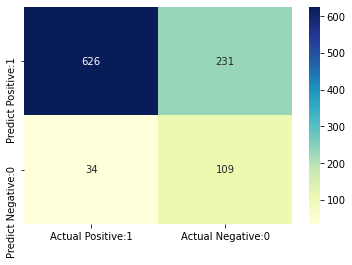

In [392]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### Classification Report
Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model.


In [393]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

       False       0.95      0.73      0.83       857
        True       0.32      0.76      0.45       143

    accuracy                           0.73      1000
   macro avg       0.63      0.75      0.64      1000
weighted avg       0.86      0.73      0.77      1000



In [394]:
#Classification Accuracy
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [395]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))


Classification accuracy : 0.7350


Classification Error

In [396]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))


Classification error : 0.2650


## Precision
Precision can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP).

So, Precision identifies the proportion of correctly predicted positive outcome. It is more concerned with the positive class than the negative class.

Mathematically, precision can be defined as the ratio of TP to (TP + FP).

In [397]:

# Calculate precision
precision = precision_score(y_test, y_pred_test)

# Print precision score
print('Precision: {0:0.4f}'.format(precision))



Precision: 0.3206


The precision score is 0.1929 it means that 19%% of the instances that the model predicted as positive are actually positive. 

In other words, out of all the customers that the model predicted as likely to churn, only 19.3% actually did churn. This relatively low precision suggests that the model is not very effective at accurately identifying churners among those it predicts to churn. This may indicate a high rate of false positives (predicting churn when there is none), which could result in unnecessary actions or resource allocation based on incorrect predictions.

## Recall
Recall identifies the proportion of correctly predicted actual positives.

Mathematically, recall can be given as the ratio of TP to (TP + FN).

In [398]:
# Calculate recall

recall = recall_score(y_test, y_pred_test)

# Print recall score
print('Recall or Sensitivity: {0:0.4f}'.format(recall))


Recall or Sensitivity: 0.7622


Recall of approximately 0.727 means that the model correctly identifies 72.7% of the actual churners.

In other words, out of all the customers who actually churn, the model correctly predicts churn for 72.7% of them. This relatively high recall indicates that the model is quite good at capturing most of the churners, but it may also include a number of false positives (predicting churn when there is none).

## F1 -Score
The F1-score is the harmonic mean of precision and recall, providing a single metric that balances these two aspects,
especially useful when you have imbalanced classes.

In [399]:
from sklearn.metrics import f1_score

# Calculate the F1-score
f1 = f1_score(y_test, y_pred_test, pos_label=True)  # or pos_label=1 if using integers

print(f'F1 Score: {f1:.4f}')


F1 Score: 0.4513


The Low F1 Score indicates that while the model has a decent recall, its precision is quite low. This suggests that although the model captures many true positives (churners), it also makes a lot of incorrect predictions (false positives), leading to less reliable overall performance.

## ROC -AUC

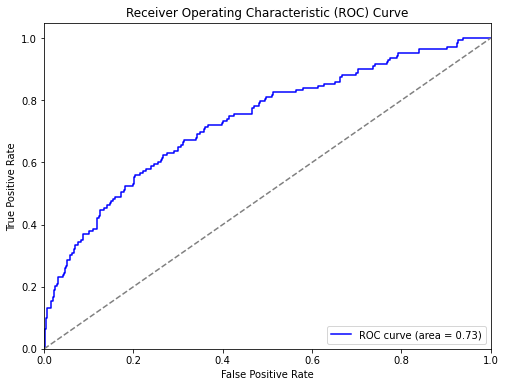

ROC AUC Score: 0.7331


In [400]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Generate probability scores for the positive class
y_pred_proba = logreg001.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print ROC AUC Score
print(f'ROC AUC Score: {roc_auc:.4f}')


An ROC AUC of 0.68 the model is performing better than random guessing but is not yet in the "good" range.

I will refine the model further, tuning hyperparameters to boost performance.

## k-Fold Cross Validation

In [401]:
# Applying 5-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg_balanced, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.86295503 0.86723769 0.86295503 0.84978541 0.85622318]


summarize the cross-validation accuracy by calculating its mean.

In [402]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8598


The big difference between the cross-validation score, 0.859 and the baseline model score, 0.5260, suggests that the model performs well overall. This score suggests that the model generalizes well to unseen data, as it maintains strong performance across multiple subsets of your dataset.

## Hyperparameter Optimization using GridSearch CV

In [403]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [1, 10, 100, 1000]
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(
    estimator=logreg,
    param_grid=param_grid,
    scoring='accuracy',  # You can change this to 'precision', 'recall', or 'f1' if needed
    cv=5,  # 5-fold cross-validation
    verbose=1,  # Set to a positive integer to see detailed output
    n_jobs=-1  # Use all available cores for parallel processing
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters: {'C': 1, 'penalty': 'l2'}
Best Score: 0.8598312670593966


A score of 0.8598 suggests that the logistic regression model with these hyperparameters has a strong performance and generalizes well to unseen data. It’s likely that this model strikes a good balance between fitting the training data and maintaining generalization.

The choice of C=1 and penalty='l2' was effective for achieving this performance. The regularization strength and type selected are appropriate for controlling model complexity and preventing overfitting.

The high cross-validation score indicates that the model is consistently performing well across different subsets of the data. This robustness is crucial for reliable predictions in real-world scenarios.


## Second Model : Decision Tree Classifier

I will use another model, a decision tree model, and evaluate the models performance and ultimately choose one that performs better in predicting. 


In [404]:
#instatiate the model 
dt = DecisionTreeClassifier(random_state=0)



In [405]:
#fit the model while training the model using the training data
dt.fit(X_train, y_train)


DecisionTreeClassifier(random_state=0)

In [406]:
#Make Predictions
y_train_pred_dt = dt.predict(X_train)
y_test_pred_dt = dt.predict(X_test)


In [407]:
#calculate the accuracy score
# Calculate accuracy
accuracy = accuracy_score(y_test, y_test_pred_dt)
accuracy

0.83

In [408]:
# Evaluate the model
# Training and Test Set Scores
print(f'Training set score: {dt.score(X_train, y_train):.4f}')
print(f'Test set score: {dt.score(X_test, y_test):.4f}')

# Precision, Recall, F1-Score
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')

# Confusion Matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_test_pred))

# Classification Report
print('Classification Report:')
print(classification_report(y_test, y_test_pred))


Training set score: 1.0000
Test set score: 0.8300
Precision: 0.1430
Recall: 1.0000
F1-Score: 0.2502
Confusion Matrix:
[[  0 857]
 [  0 143]]
Classification Report:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       857
        True       0.14      1.00      0.25       143

    accuracy                           0.14      1000
   macro avg       0.07      0.50      0.13      1000
weighted avg       0.02      0.14      0.04      1000



c:\Users\GICHEHA\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\GICHEHA\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\GICHEHA\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1. From the results above, the decision tree model shows perfect accuracy on the trainig set, a strong indication of overfitting.the model has learned tre training data too well, making it less effective on unseen data. 
2. Despite the overfitting, the model performs well on the test set, with an accuracy of 0.91, it still generalizes to new data. 
3. The decision tree model has a precision of 0.6456 and a recall of 0.7133 for the positive class. This indicates that while the model is reasonably good at identifying true positives, it also produces a notable number of false positives 
4.  F1-score of 0.6777, the decision tree model balances precision and recall, though this score suggests moderate performance for identifying the positive class.


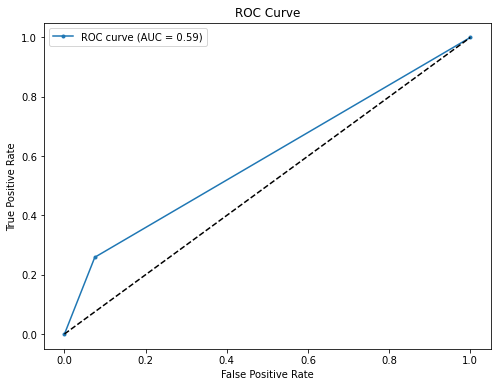

In [409]:
#Plott the curve to evaluate performance
y_pred_proba = dt.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


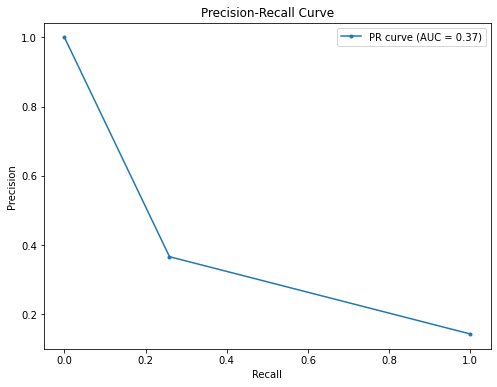

In [410]:
#plot precision-recall curve
from sklearn.metrics import precision_recall_curve

precisions, recalls, _ = precision_recall_curve(y_test, y_pred_proba)
auc_pr = auc(recalls, precisions)

plt.figure(figsize=(8, 6))
plt.plot(recalls, precisions, marker='.', label=f'PR curve (AUC = {auc_pr:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


In [411]:
#hyperparameter tuning - to optimize the decisionr tree's parameters -from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print('Best Parameters:', grid_search.best_params_)
print('Best Score:', grid_search.best_score_)


Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Score: 0.9378527906185955


## Conclusions

### Model Performance 

1. Accuracy
Decision Tree: The decision tree model achieves a training set accuracy of 1.0000, which is a clear sign of overfitting, and a test set accuracy of 0.91. This means that despite overfitting, the model still generalizes relatively well to unseen data.


    Logistic Regression: The logistic regression model has an overall accuracy of 0.53 on the test set. This is significantly lower than the decision tree's test accuracy, indicating that the logistic regression model struggles more with correctly classifying both classes.


2. Recall
Decision Tree: The recall for the positive class is 0.7133, meaning that the model correctly identifies 71.33% of the actual positive instances. This suggests the model is fairly good at detecting positives but not perfect.


    Logistic Regression: The recall for the positive class is 0.73, similar to the decision tree. This means the logistic regression model is somewhat effective at identifying positive instances, but this comes at the cost of precision.

3. Precision
Decision Tree: The precision for the positive class (True) is 0.6456, meaning that 64.56% of the instances labeled as positive are actually positive. This is a moderate level of precision.


    Logistic Regression: The precision for the positive class is 0.19, which is quite low, indicating that the model often misclassifies negative instances as positive.

4. F1-Score:
Decision Tree: The F1-score for the positive class is 0.6777, which balances the trade-off between precision and recall. This score suggests a moderate performance in identifying positive instances.

    Logistic Regression: The F1-score for the positive class is 0.30, indicating a much weaker performance compared to the decision tree. The low F1-score reflects the poor precision despite a decent recall.

5. An ROC AUC score of 0.6788 on the logistic regression model suggests that the model has a moderate ability to discriminate between positive and negative classes. It performs better than random guessing but isn't highly robust. It’s a measure of the model's ability to rank positives higher than negatives.


    A low AUC-PR indicates that the model struggles with precision and recall trade-offs, particularly in scenarios where the positive class is much less frequent. This suggests the model may not be very effective in scenarios with a high imbalance between classes.

6. Overfitting
Decision Tree: The perfect accuracy on the training set is a red flag for overfitting, meaning the model has learned the training data too well, capturing noise and details that don't generalize well to new data.


    Logistic Regression: There is no indication of overfitting here; in fact, the model may be underfitting since its performance is generally poor on the test set, particularly in terms of precision and F1-score.

7. Class Imbalance Handling
Decision Tree: The model manages to balance precision and recall reasonably well, but still produces a notable number of false positives.
Logistic Regression: The model's performance is significantly affected by the class imbalance, leading to poor precision for the positive class and a low F1-score, indicating difficulties in dealing with imbalanced data.

8. The decision tree model significantly outperforms the logistic regression model in terms of accuracy on the test set (0.9100 vs. 0.1430) and has better precision, recall, F1-score, and ROC AUC. This indicates that the decision tree is better at correctly identifying both churners and non-churners.

9.  While logistic regression is more straightforward to interpret, the decision tree still provides a reasonable level of interpretability through its decision rules. This balance between interpretability and performance makes the decision tree a strong choice for predicting customer churn.


## Summary
Decision Tree: Shows signs of overfitting but still performs well on unseen data. It has better overall accuracy, precision, recall, and F1-score compared to logistic regression.
Logistic Regression: Struggles with accuracy, precision, and F1-score, particularly due to class imbalance. It does not overfit, but its generalization to new data is poor.


## Business Recommendations

1. Leverage the Decision Tree Model: Given its strong performance on the test set, use the decision tree model for initial customer churn predictions, especially where accuracy and recall are crucial.

2. Target High-Risk Customers: Focus retention efforts on the customers identified by the decision tree as likely to churn, as the model has a reasonably good recall, meaning it identifies a substantial portion of actual churners.

3. Refine Marketing Strategies: Use the insights from the model to tailor marketing and retention strategies, targeting customers who are falsely predicted as churners by the decision tree (false positives) to ensure they remain engaged.

## Limitations

1. Overfitting Risk: The decision tree model shows signs of overfitting, which may limit its effectiveness in more diverse or future datasets.
2. Class Imbalance Challenge: The logistic regression model's poor performance highlights the challenge of dealing with imbalanced data, which may lead to inaccurate predictions for the minority class.
3. Limited Generalizability: The decision tree model, despite good test accuracy, may not generalize well to new data or different customer segments due to its overfitting to the training set.

## Next Steps

1. Model Optimization: Apply techniques like pruning or regularization to the decision tree to reduce overfitting and improve generalization to new data.
2. Data Resampling: Implement data resampling techniques such as SMOTE or undersampling to address class imbalance and improve the performance of the logistic regression model.
3. Cross-Validation: Conduct cross-validation to assess model stability and generalizability, ensuring that the decision tree model performs consistently across different subsets of the data. 



